In [1]:
%matplotlib inline

In [2]:
import poppy as pop
import numpy as np
import matplotlib.pyplot as plt
import poputils as mepop                            # For img & creation

/home/novae/rey/anaconda3/lib/python3.7/site-packages/pysynphot/locations.py:46: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/home/novae/rey/anaconda3/lib/python3.7/site-packages/pysynphot/locations.py:329: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [3]:
import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '../Utils'))
import plot as meplot                               # For graphs
sys.path.remove(os.path.join(sys.path[0], '../Utils'))

In [4]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['image.origin'] = True

## **Parameters**

In [5]:
wvlgth = 1e-6 #666e-9  

rad_tel = 1.2/2      
focal = 18*(2*rad_tel)

rad_obs = 0.3/2                                             # obscuration ratio
nb_spid = 4                                                  # [m]
spid_width = 0.05                                            # [m]

print('Wavelength = {} m'.format(wvlgth))
print('Aperture = {} m'.format(2*rad_tel))
print('Focal length = {x:.3f} m \n'.format(x=focal))
print('Fresnel number = {x:.3f}'.format(x=(2*rad_tel)**2/(wvlgth*focal)))

Wavelength = 1e-06 m
Aperture = 1.2 m
Focal length = 21.600 m 

Fresnel number = 66666.667


## **Aperture Auxtel (spiders + central obscuration)**

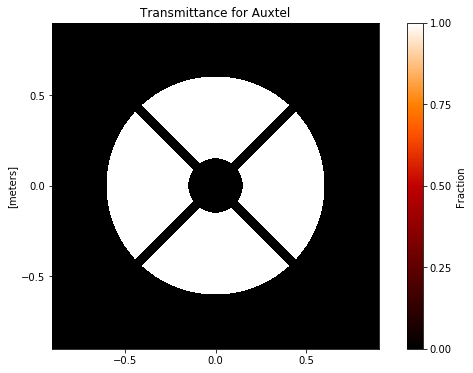

In [6]:
final_ap = mepop.make_aperture(rad_obs, nb_spid, spid_width, rad_tel, 
                               showimg=True, rotation=45)

## **Zernike**

In [7]:
pixsize = 0.10                                # Unit: micron/pixel
fov = 16.0                                    # microns

## **Normal one**

In [8]:
psf_1 = mepop.make_psf(final_ap, focal, wvlgth, rad_tel, pixsize, fov, 
                     shift=0, showimg=False, logscale=True, showsteps=False)

int_map_1 = psf_1[0].data

halffov_x_1 = pixsize * int_map_1.shape[1] / 2.0  
xaxis_1 = np.linspace(-halffov_x_1,halffov_x_1,np.shape(int_map_1)[1])

## **MULTIPLOOOOOT**

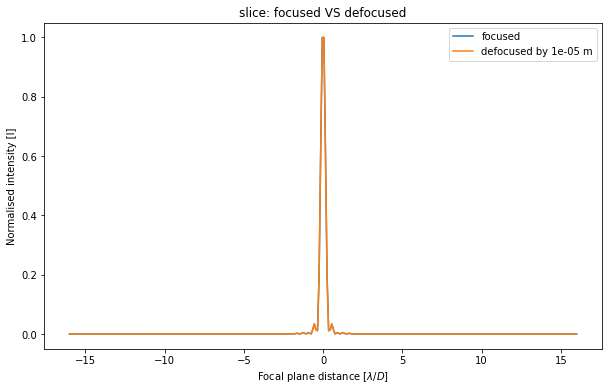

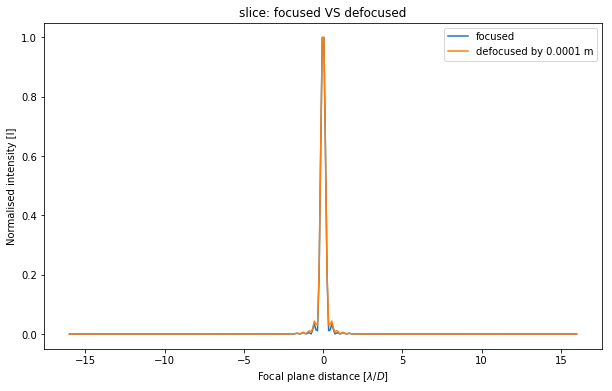

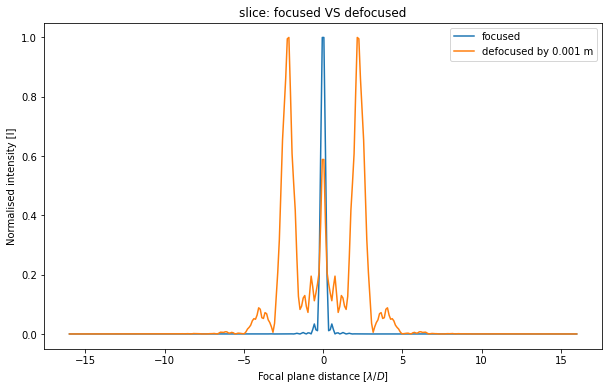

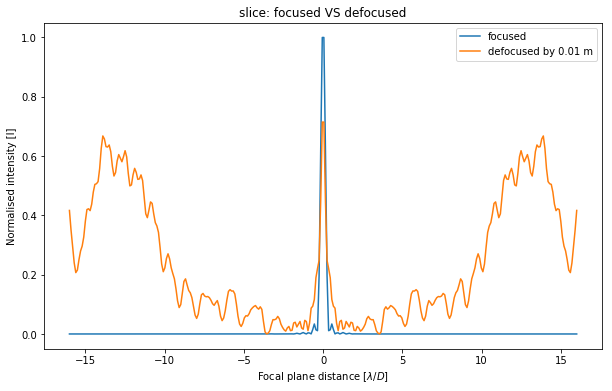

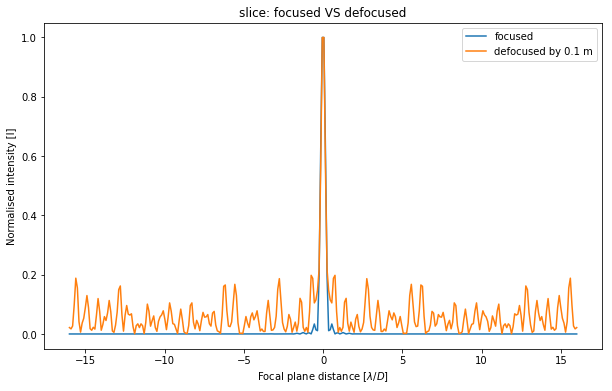

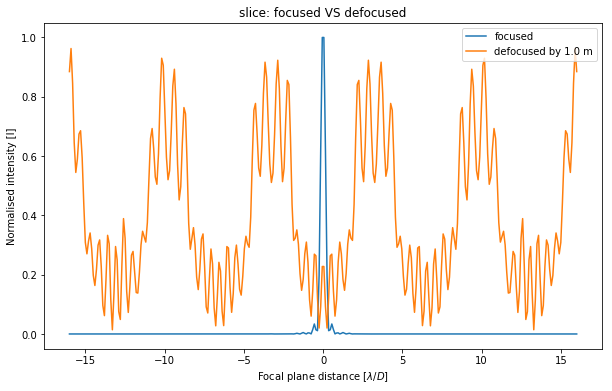

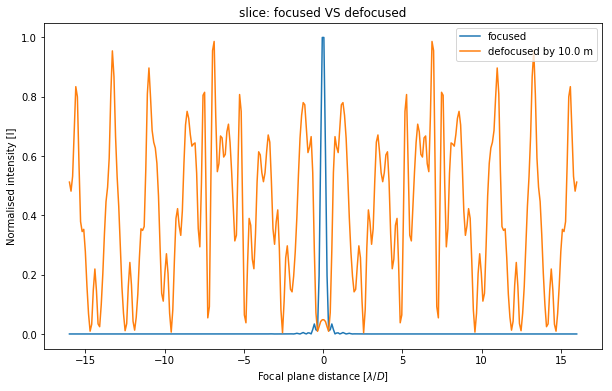

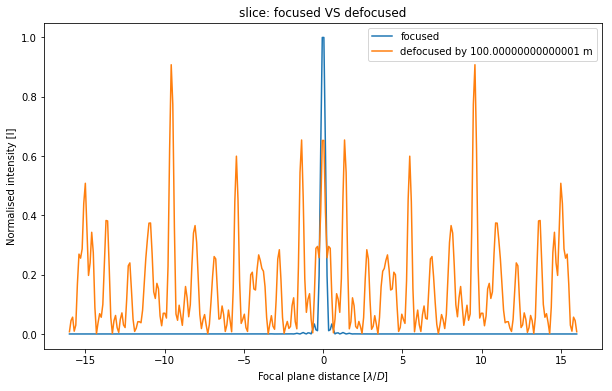

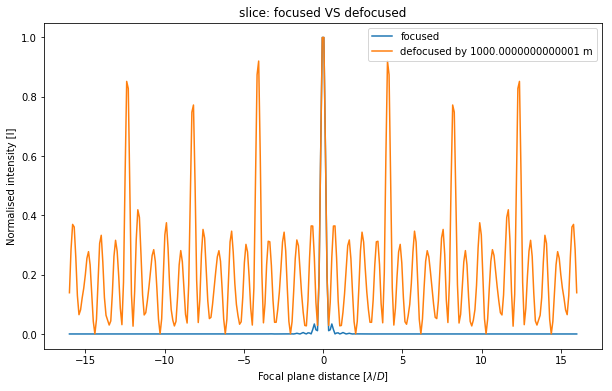

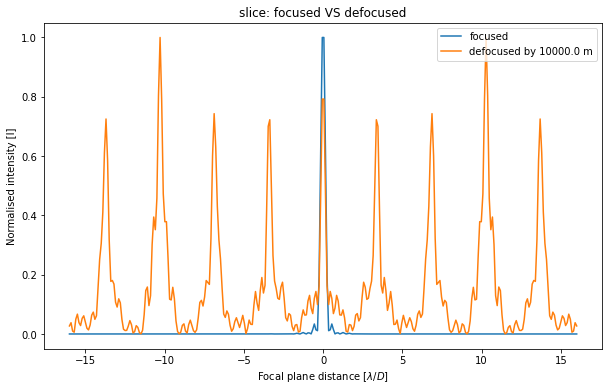

In [12]:
nbit = 10
for i in range (nbit):
    
    shift =  0.00001*10**i   #0.003*10**i                  # Longitudinal displacement [m]

    psf_2 = mepop.make_psf(final_ap, focal, wvlgth, rad_tel, pixsize, fov, 
                       shift=shift, showimg=False, logscale=True, showsteps=False)

    int_map_2 = psf_2[0].data
    
    halffov_x_2 = pixsize * int_map_2.shape[1] / 2.0  
    xaxis_2 = np.linspace(-halffov_x_2,halffov_x_2,np.shape(int_map_2)[1])

    meplot.foc_VS_defoc(int_map_1, int_map_2, xaxis_1, xaxis_2, shift,
                  logscale=False, normalised=True, wantslice=True)
    #one_plot(psf_1, shift, logscale=True, normalised=True)